In [28]:
# Import the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

In [30]:
df = pd.read_csv('mall.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [31]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
# ANSI escape codes for red and blue text
RED = '\033[91m'
BLUE = '\033[94m'
RESET = '\033[0m'  # Resets color to default

for col in df.columns:
    num_unique_values = df[col].nunique()
    if pd.api.types.is_numeric_dtype(df[col]):
        dtype = f"{BLUE}numerical{RESET}"  # Make "numerical" blue
    else:
        dtype = f"{RED}categorical{RESET}"  # Make "categorical" red

    print(f"Column '{col}' has {num_unique_values} unique {dtype} items")

Column 'CustomerID' has 200 unique numerical items
Column 'Genre' has 2 unique categorical items
Column 'Age' has 51 unique numerical items
Column 'Annual Income (k$)' has 64 unique numerical items
Column 'Spending Score (1-100)' has 84 unique numerical items


In [33]:
for col in df.columns:
    missing_values = df[col].isnull().sum()
    if missing_values == 0:
        result = f"{BLUE}{missing_values} missing values{RESET}"
    else:
        result = f"{RED}{missing_values} missing values{RESET}"

    print(f"Column '{col}' has {result}")

Column 'CustomerID' has 0 missing values
Column 'Genre' has 0 missing values
Column 'Age' has 0 missing values
Column 'Annual Income (k$)' has 0 missing values
Column 'Spending Score (1-100)' has 0 missing values


#### At the end we will want to visualise the clusters in a 2-dimensional graph, meaning that in the X axis we will have one feature and in the Y axis another one. At this moment, we have a dataset with too many columns, so let's focus on only using the 'Anual Income' and 'Spending Score' features. Moreover, we can drop the 'CustomerID' column since it does not provide any useful information for this project

In [35]:
df.drop(['CustomerID'], axis = 1, inplace = True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### Now we can select the X matrix of features. For clustering, we do not have a y matrix, since we do not have a dependent variable and we just simply want to cluster the dataset.

In [48]:
X = df.iloc[:, [2, 3]].values

## Optimal number of clusters: Elbow method

#### We will run the KMeans algorithm several times with different number of clusters until we find the optimal one. We will use a for loop for 10 clusters and each time we run the KMeans algorithm we will compute the WCSS (The sum of the square distances between each observation point of the cluster and the centroid).

In [55]:
from sklearn.cluster import KMeans

wcss = [] # Initialises an empty list with the wcss values for each iteration

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 19)      # The init parameter avoids the random initialisation trap
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Text(0.5, 1.0, 'KMeans elbow method')

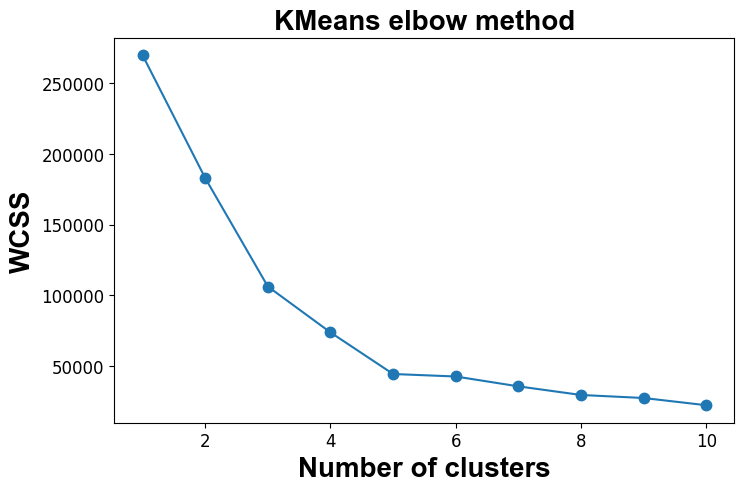

In [69]:
plt.figure(figsize = (8, 5))
plt.plot(range(1, 11), wcss, '.-', markersize = 15)
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Number of clusters', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('WCSS', fontsize = 20, fontweight='bold', **csfont)
plt.title('KMeans elbow method', fontsize = 20, fontweight='bold', **csfont)

## Optimal KMeans algorithm

In [80]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 19)
y_pred = kmeans.fit_predict(X)

C:\Users\gabri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Visualising the clusters

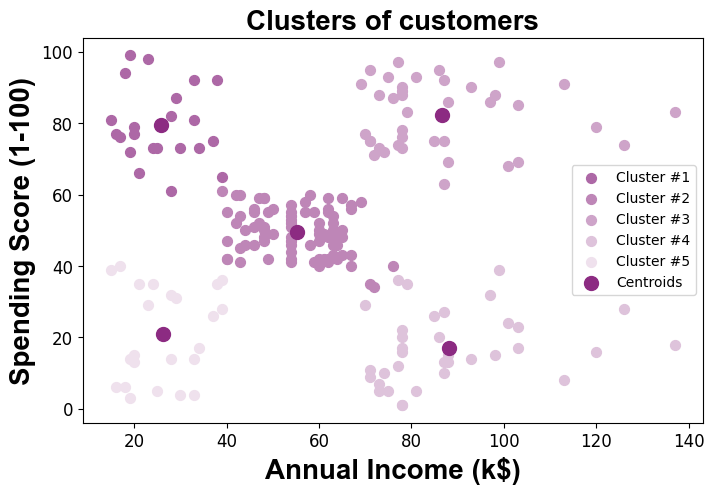

In [112]:
plt.figure(figsize = (8, 5))
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 50, c = '#ad68a6', label = 'Cluster #1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 50, c = '#be86b7', label = 'Cluster #2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 50, c = '#cea4c9', label = 'Cluster #3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 50, c = '#dec3db', label = 'Cluster #4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 50, c = '#efe1ed', label = 'Cluster #5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = '#8c2b82', label = 'Centroids')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.xlabel('Annual Income (k$)', fontsize = 20, fontweight='bold', **csfont)
plt.ylabel('Spending Score (1-100)', fontsize = 20, fontweight='bold', **csfont)
plt.title('Clusters of customers', fontsize = 20, fontweight='bold', **csfont)
plt.legend()